## Actividad 6 - implementación paso a paso con Scikitlearn (datos sinteticos)

Fecha: 09-02-26

Codigo del alumno: 219439844

Nombre del alumno Jesús Santiago Martínez Velarde 

**Objetivo**: Aprender el flujo tipico en Machine learning con **scikit-learn** de forma sencilla. 

## Librerias requeridas en python 

Para esta actividad se usan las librerias estandar del ecosistema cientifico:

- **numpy:** Manejo de arreglos númericos.

- **matplotlib**: Graficos.

- **scikit-learn**: Generación de datos, partición train test, modelos, métricas y pipelines.

## Instalación

 pip install numpy matplotlib scikit-learn

In [1]:
# 1) Importaciones 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2) Generación de datos sinteticos 

Usaremos make_clasification para crear un dataset artificail de **2 caracteristicas** (Para poder graficar en 2D) y **2 clases** (clasificación binaria) 


In [2]:
# Generamos datos sintéticos reproducibles (random_state fijo)
X, y = make_classification(
n_samples=500, # número de muestras
n_features=2, # 2 características para poder graficar en 2D
n_redundant=0, # sin características redundantes
n_informative=2, # ambas características son informativas
n_clusters_per_class=1,
class_sep=1.2, # separación entre clases (más grande = más fácil)
random_state=42
)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Clases (conteo):", dict(zip(*np.unique(y, return_counts=True))))

X shape: (500, 2)
y shape: (500,)
Clases (conteo): {0: 249, 1: 251}


## 3) Visualización rápida de los datos 

Antes de entrenar conviene mirar como se ven los datos.


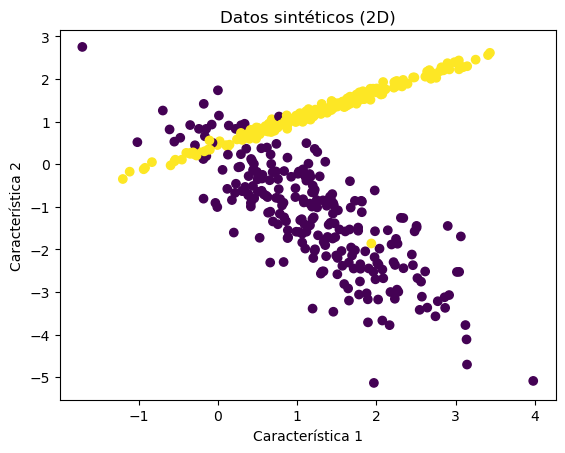

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Datos sintéticos (2D)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

## 4) Separación en entrenamiento y prueba

Separamos en **80% entrenamiento y 20% prueba**

- Entrenamiento: el modelo aprende patrones

- Prueba: evaluación final en datos no vistos 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y # Mantiene proporciones de clases
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (400, 2) Test: (100, 2)


## 5) Pipeline (Estandarización + Modelo)

Un pipeline encadena pasos y evita errores comunes (por ejemplo, escalar usando información del test).

- StandarScaler: Centra y escala las variables (recomendado para muchos modelos).

- LogisticRegression: Clasificador lineal simple y robusto

In [7]:
#Creamos el pipeline
model = Pipeline( steps=[
    ("Scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=42))
])

#Entrenamos 
model.fit(X_train, y_train)

print("Modelo entrenado")

Modelo entrenado


## 6) Evaluación del modelo 

Calcularemos: 

- Accuracy (exactitud)

- Matriz de confusión

- Reporte de clasificación (precision, recall, f1-score)

In [9]:
#Predicciones en el conjunto de prueba 
y_pred = model.predict(X_test)

acc = accuracy_score ( y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("\nMatriz de confusión: \n", cm)
print("\nReporte de clasificación: \n", report)

Accuracy: 0.91

Matriz de confusión: 
 [[44  6]
 [ 3 47]]

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        50
           1       0.89      0.94      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



## 7) Gráfica del resultado: frontera de desición

Como tenemos 2 variables, podemos graficar la **frontera de decisión** del clasificador. Esto ayuda a entender "Como esta separando" el modelo

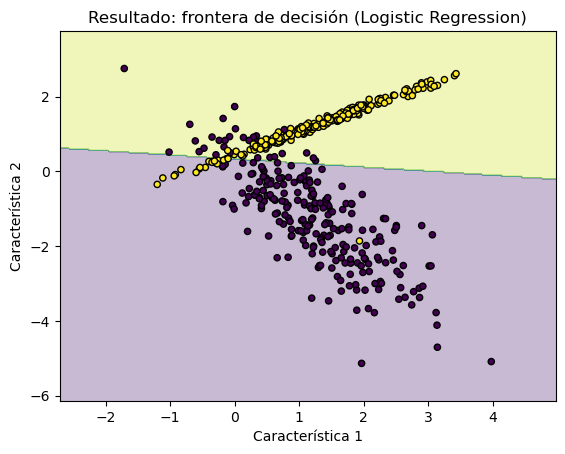

In [19]:
# Función auxiliar para dibujar frontera de decisión en 2D
def plot_decision_boundary(model, X, y, title="Frontera de decisión"):
    # Definimos una malla (grid) en el espacio 2D
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

# Graficamos usando TODO el dataset (solo para visualización)
plot_decision_boundary(model, X, y, title="Resultado: frontera de decisión (Logistic Regression)")

## 8) Conclusión

Ya implementaste un flujo completo y correcto de scikit-learn: 

- Generación de datos sinteticos

- Visualización

- Train/Test split

- Pipeline (escalado + modelo).

- Entrenamiento y evaluación

- Grafica del resultado (Frontera de desición)